***ONLINE PAYMENT FRAUD DETECTION***

***Import neccessary libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***Read the csv file***

In [2]:
df = pd.read_csv('C:\\Users\\Aaditya\\Downloads\Project\\Online_Payment_Fraud_Detection.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


***About data:***
1. *Step: Represents a unit of time, where each step corresponds to a specific timeframe, often one hour.*
2. *Type: Indicates the type of online transaction, specifying whether it's a transfer, payment, etc.*
3. *Amount: Represents the monetary value involved in the transaction.*
4. *NameOrig: Identifies the customer initiating the transaction.*
5. *OldbalanceOrg: Reflects the account balance before the transaction for the originating customer.*
6. *NewbalanceOrig: Represents the account balance after the transaction for the originating customer.*
7. *NameDest: Identifies the recipient of the transaction.*
8. *OldbalanceDest: Indicates the initial balance of the recipient before the transaction.*
9. *NewbalanceDest: Represents the new balance of the recipient after the transaction.*
10. *IsFraud:  A binary indicator specifying whether the transaction is fraudulent (1) or legitimate (0).*

***Display the non-null count and data type of each columns***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048573 non-null  float64
 3   nameOrig        1048573 non-null  object 
 4   oldbalanceOrg   1048574 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048574 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048574 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


*Every datatype looks correct as per the columns.*

***Display the statistical values of numeric columns***

In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048573e+06,1.048574e+06,1.048575e+06,1.048575e+06,1.048574e+06,1.048575e+06
mean,2.696617e+01,1.586672e+05,8.740103e+05,8.937996e+05,9.781600e+05,1.114195e+06,1.296045e-03
std,1.562325e+01,2.649411e+05,2.971752e+06,3.008260e+06,2.296780e+06,2.416592e+06,3.597730e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214904e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634393e+04,1.600186e+04,0.000000e+00,1.263772e+05,2.182581e+05,0.000000e+00
75%,3.900000e+01,2.137620e+05,1.366425e+05,1.745921e+05,9.159235e+05,1.149787e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


***Display the sum of null values***

In [5]:
df.isnull().sum()

step              0
type              0
amount            2
nameOrig          2
oldbalanceOrg     1
newbalanceOrig    0
nameDest          1
oldbalanceDest    0
newbalanceDest    1
isFraud           0
dtype: int64

*There are few null values in amount, nameOrig, oldbalanceOrig, nameDest and newbalanceDest columns.*

***Display the number of rows and columns***

In [6]:
df.shape

(1048575, 10)

*There are 1048575 rows and 10 columns.*

***Drop the null values from the original DataFrame***

In [7]:
df.dropna(inplace=True)

*As we've massive amount of data and less number of null values.
We've droped the null values directly.*

***Display the sum of duplicated values***

In [8]:
df.duplicated().sum()

0

*There are no duplicate values.*

***Display the statistical values of Non-Numeric columns***

In [9]:
df.describe(include='object')

,type,nameOrig,nameDest
count,1048568,1048568,1048568
unique,5,1048310,449632
top,CASH_OUT,C1268675361,C985934102
freq,373638,2,98


*The above function shows that:*

*There are 5 distinct types of transactions in which Cash-outs are made maximum number of times.
The maximum number of transactions are 2 which are made from C1268675361.
And maximum number of transactions are made to C985934102 whose frequency is 98 times.*

***Display the number of times each type of transactions are made***

*As the data is massive we will use seaborn for visualization.*

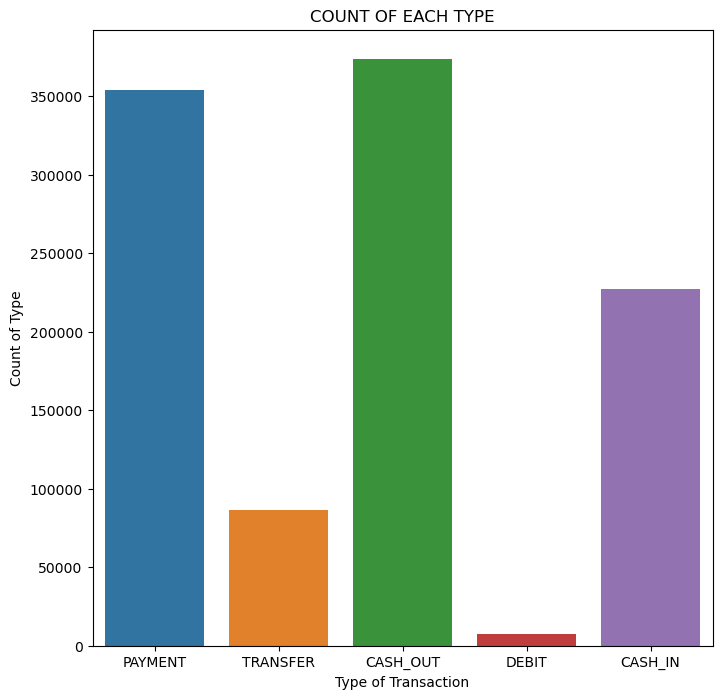

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['type'])
plt.title('COUNT OF EACH TYPE')
plt.xlabel('Type of Transaction')
plt.ylabel('Count of Type')
plt.show()

*In the above count plot, we've seen that the maximum count of transactions is done through cash-out or payment whereas the transactions through cash-ins are in counted less than that.
Transactions of transfers and debits are less as compared to others.*

***Display the amount of transactions are made through each type***

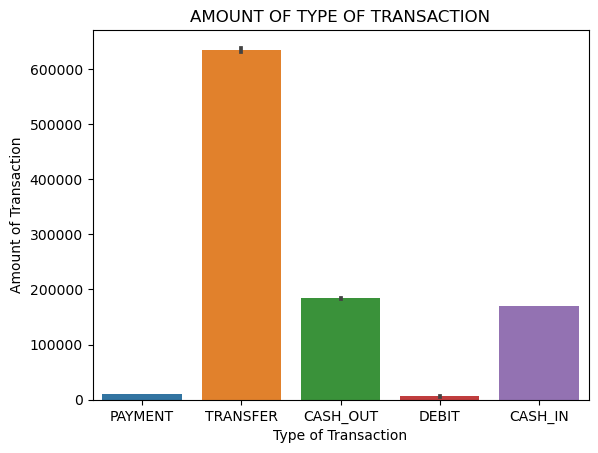

In [11]:
sns.barplot(data=df,x=df['type'],y=df['amount'])
plt.title('AMOUNT OF TYPE OF TRANSACTION')
plt.xlabel('Type of Transaction')
plt.ylabel('Amount of Transaction')
plt.show()

*In the above bar graph, the maximum amount is used while transferring whereas smaller amount is used through cash-ins and cash-outs.
Minimum amount is utilized during payments and debits.*

***Display the amount of transaction made through each type categorized into Frauds and Legits***

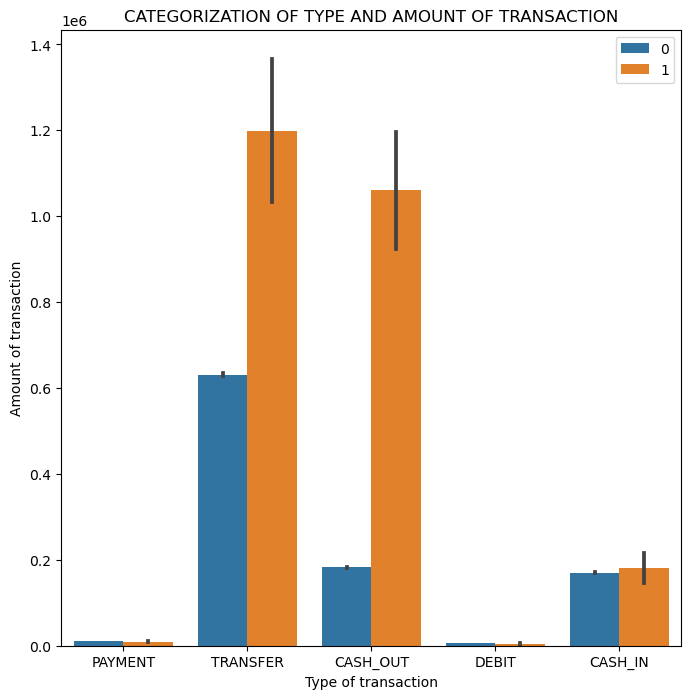

In [12]:
plt.figure(figsize=(8,8))
sns.barplot(data=df,x=df['type'],y=df['amount'],hue=df['isFraud'])
plt.title('CATEGORIZATION OF TYPE AND AMOUNT OF TRANSACTION')
plt.xlabel('Type of transaction')
plt.ylabel('Amount of transaction')
plt.legend()
plt.show()

*In the above graph, 0 represents Legit transactions and 1 represents Fraudulent Transactions. Maximum number of fraudulent transactions are done using transfer and cash-out. Debit have less number of fraudulent transactions. And Payment and cash-ins have almost the equal number of fraud and legit transactions.
Here, the values indicates millions. Eg. 0.2 = 0.2 millions i.e. 2,00,000*

***Display the relationship between Step and Amount differentiated by Fraud and Legit***

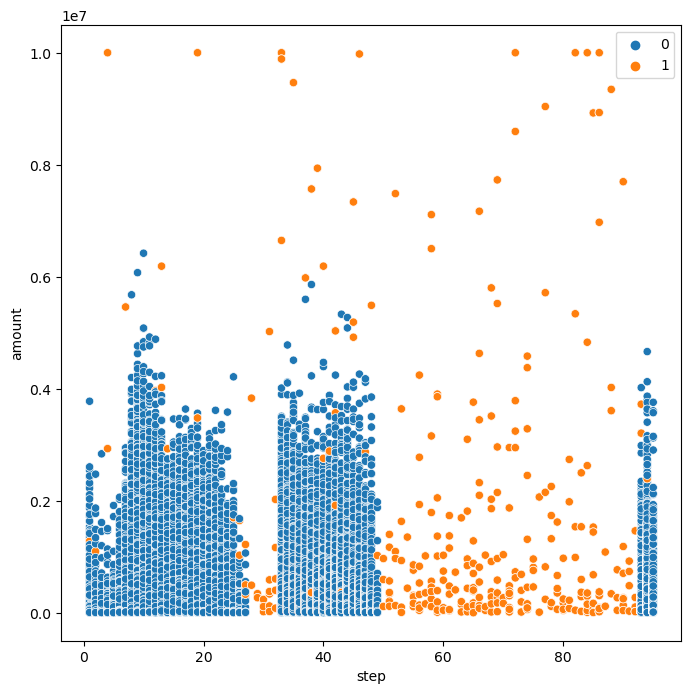

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df,x=df['step'],y=df['amount'],hue=df['isFraud'])
plt.legend()
plt.show()

*The above scatter plot shows that no matter what step it is, there are gonna be fraud tansactions.
But the Legit Transaction didn't exceeds 7 millions. Here, the values after the decimal point indicates millions. Eg. 0.2 = 2 million i.e. 2,000,000*

***Display the percent of Fraud and Legit transactions in dataset***

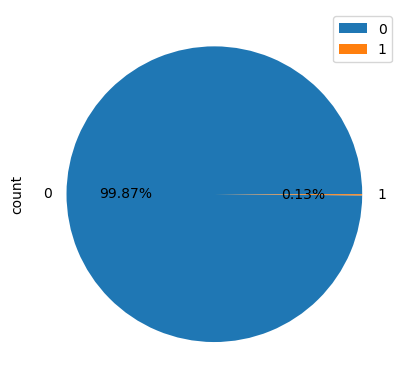

In [14]:
df['isFraud'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.legend()
plt.show()

*Above pie chart shows that only 0.13% of Transactions are Fraud and remaining 99.87% of transactions are Legit.
We should be glad that there are very less fraud transactions compared to the Legit ones.*

***Create a series consisting of categorical column names***

In [15]:
cat_col = df.select_dtypes ('object').columns
cat_col

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

***Import LabelEcoder***

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

***Fit and transform the categorical columns into numeric columns using Encoder***

In [17]:
for i in range(0,len(cat_col)):
    df[cat_col[i]] = le.fit_transform(df[cat_col[i]])

***Check if all the columns are numeric***

In [18]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,125161,170136.00,160296.36,274915,0.00,0.00,0
1,1,3,1864.28,361316,21249.00,19384.72,286714,0.00,0.00,0
2,1,4,181.00,165233,181.00,0.00,73550,0.00,0.00,1
3,1,1,181.00,961655,181.00,0.00,65464,21182.00,0.00,1
4,1,3,11668.14,567911,41554.00,29885.86,138001,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,1,132557.35,97389,479803.00,347245.65,67716,484329.37,616886.72,0
1048571,95,3,9917.36,517550,90545.00,80627.64,388385,0.00,0.00,0
1048572,95,3,14140.05,562204,20545.00,6404.95,160789,0.00,0.00,0
1048573,95,3,10020.05,343314,90605.00,80584.95,272150,0.00,0.00,0


***Display the relation between all columns***

<Axes: >

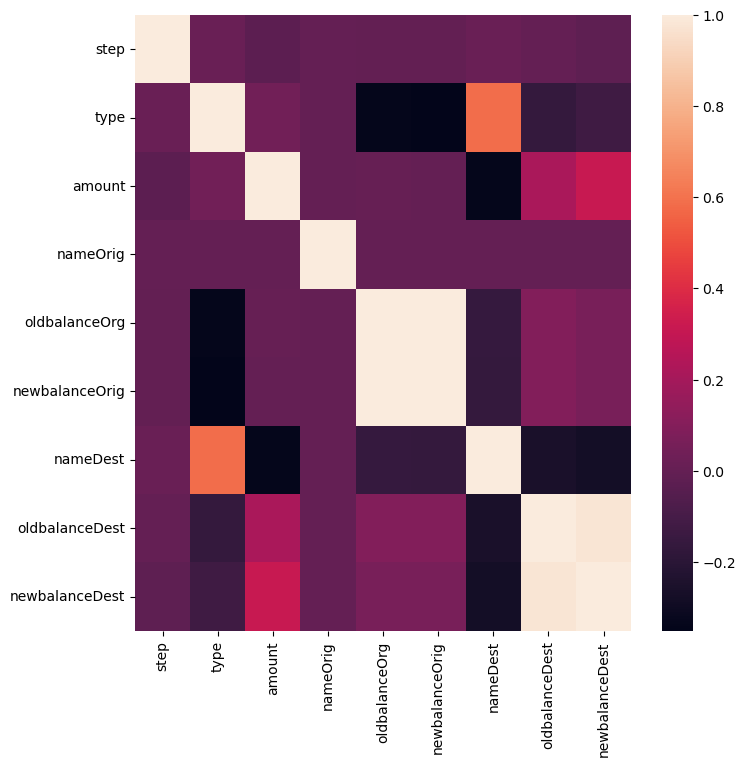

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.iloc[:,:-1].corr())

*As we can see only newbalanceOrig and newbalanceDest are correlated with oldbalanceOrg and oldbalanceDest.
It is obvious for these columns that they are correlated as the amount is transferred it will reflect the equal amount of changes between new balance and old balance.
None other columns are correlated.*

***Check if the data is imbalanced or not. Display the number of rows of target column***

In [20]:
count_0,count_1 = df['isFraud'].value_counts()
df_0= df[df['isFraud']==0]
df_1= df[df['isFraud']==1]

In [21]:
df_0.shape

(1047209, 10)

In [22]:
df_1.shape

(1359, 10)

*We can see there's a huge difference between the rows of Frauds and Legits i.e. The model is imbalanced.*

In [23]:
count_0

1047209

In [24]:
count_1

1359

*As the model is imbalanced, we will use the over sampling method because the data is large.*

***Over Sampling***

In [25]:
df_1 = df_1.sample(count_0,replace=True)
df_1.shape

(1047209, 10)

In [26]:
df_test = pd.concat([df_0,df_1],axis=0)
df_test.isFraud.value_counts()

isFraud
0    1047209
1    1047209
Name: count, dtype: int64

***Split the data into independent and target variables***

In [27]:
x = df_test.iloc[:,:-1]
y = df_test.iloc[:,-1]

***Split the data into train and test***

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

***Import algorithms for training***

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [30]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    ac = accuracy_score(ytest,yp)
    print('Accuracy:', ac)   

***Train the model using different algorithms :***

***1. Random Forest Algorithm***

In [31]:
for i in range(50,65):
    rf = RandomForestClassifier(max_depth=i)
    print('Max_depth:', i)
    print(mymodel(rf))

Max_depth: 50
Accuracy: 0.9999847213070922
None
Max_depth: 51
Accuracy: 0.9999904508169326
None
Max_depth: 52
Accuracy: 0.9999885409803191
None
Max_depth: 53
Accuracy: 0.9999885409803191
None
Max_depth: 54
Accuracy: 0.9999904508169326
None
Max_depth: 55
Accuracy: 0.9999866311437057
None
Max_depth: 56
Accuracy: 0.9999847213070922
None
Max_depth: 57
Accuracy: 0.9999904508169326
None
Max_depth: 58
Accuracy: 0.9999866311437057
None
Max_depth: 59
Accuracy: 0.9999885409803191
None
Max_depth: 60
Accuracy: 0.9999885409803191
None
Max_depth: 61
Accuracy: 0.9999828114704787
None
Max_depth: 62
Accuracy: 0.9999847213070922
None
Max_depth: 63
Accuracy: 0.9999866311437057
None
Max_depth: 64
Accuracy: 0.9999847213070922
None


*Among the all the max_depth, 51 gives us the best accuracy i.e. 99.99%.*

In [32]:
for i in range(2,50):
    rf = RandomForestClassifier(max_depth=51,min_samples_split=i)
    print('Min_samples_split:', i)
    print(mymodel(rf))

Min_samples_split: 2
Accuracy: 0.9999866311437057
None
Min_samples_split: 3
Accuracy: 0.9999866311437057
None
Min_samples_split: 4
Accuracy: 0.9999866311437057
None
Min_samples_split: 5
Accuracy: 0.9999789917972517
None
Min_samples_split: 6
Accuracy: 0.9999866311437057
None
Min_samples_split: 7
Accuracy: 0.9999866311437057
None
Min_samples_split: 8
Accuracy: 0.9999923606535461
None
Min_samples_split: 9
Accuracy: 0.9999866311437057
None
Min_samples_split: 10
Accuracy: 0.9999789917972517
None
Min_samples_split: 11
Accuracy: 0.9999828114704787
None
Min_samples_split: 12
Accuracy: 0.9999885409803191
None
Min_samples_split: 13
Accuracy: 0.9999866311437057
None
Min_samples_split: 14
Accuracy: 0.9999904508169326
None
Min_samples_split: 15
Accuracy: 0.9999885409803191
None
Min_samples_split: 16
Accuracy: 0.9999885409803191
None
Min_samples_split: 17
Accuracy: 0.9999866311437057
None
Min_samples_split: 18
Accuracy: 0.9999866311437057
None
Min_samples_split: 19
Accuracy: 0.9999809016338652
None


*Among the all the min_samples_split, 14 gives us the best accuracy i.e. 99.99%.*

In [33]:
for i in range(1,20):
    rf = RandomForestClassifier(max_depth=51,min_samples_split=14,min_samples_leaf=i)
    print('Min_samples_leaf:', i)
    print(mymodel(rf))

Min_samples_leaf: 1
Accuracy: 0.9999885409803191
None
Min_samples_leaf: 2
Accuracy: 0.9999789917972517
None
Min_samples_leaf: 3
Accuracy: 0.9999732622874113
None
Min_samples_leaf: 4
Accuracy: 0.9999656229409574
None
Min_samples_leaf: 5
Accuracy: 0.99995607375789
None
Min_samples_leaf: 6
Accuracy: 0.9999446147382092
None
Min_samples_leaf: 7
Accuracy: 0.9999331557185283
None
Min_samples_leaf: 8
Accuracy: 0.9999216966988475
None
Min_samples_leaf: 9
Accuracy: 0.9999025983327127
None
Min_samples_leaf: 10
Accuracy: 0.9998854098031913
None
Min_samples_leaf: 11
Accuracy: 0.9998758606201239
None
Min_samples_leaf: 12
Accuracy: 0.9998510327441488
None
Min_samples_leaf: 13
Accuracy: 0.9998605819272162
None
Min_samples_leaf: 14
Accuracy: 0.9998338442146274
None
Min_samples_leaf: 15
Accuracy: 0.9998262048681735
None
Min_samples_leaf: 16
Accuracy: 0.9998013769921983
None
Min_samples_leaf: 17
Accuracy: 0.9997784589528366
None
Min_samples_leaf: 18
Accuracy: 0.9997631802599287
None
Min_samples_leaf: 19


*Among the all the min_samples_leaf, 1 gives us the best accuracy i.e. 99.99%.*

***So the final accuracy of Random Forest Algorithm is 99.99%***

***2. Logistic Regression Algorithm***

In [34]:
solvers = pd.Series(['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'])

In [35]:
for i in range(0,len(solvers)):
    lr=LogisticRegression(solver=solvers[i])
    print('Solver :',solvers[i])
    print(mymodel(lr))

Solver : lbfgs
Accuracy: 0.8300149922174158
None
Solver : liblinear
Accuracy: 0.8300149922174158
None
Solver : newton-cg
Accuracy: 0.8427803401419008
None
Solver : sag
Accuracy: 0.8296540330974685
None
Solver : saga
Accuracy: 0.829652123260855
None


*Among all the solvers, newton-cg solver gives us the best accuracy i.e. 84.27%.*

In [36]:
penalties = pd.Series(['l2','none'])

*As newton-cg supports only 'l2' or 'none' penalties, we will use 'l2' and 'none' for penalty iteration.*

In [37]:
for i in range(0,len(penalties)):
    lr=LogisticRegression(solver='newton-cg',penalty=penalties[i])
    print('Penalty :',penalties[i])
    print(mymodel(lr))

Penalty : l2
Accuracy: 0.8427803401419008
None
Penalty : none
Accuracy: 0.8436149387419907
None


*Among all the penalties, none penalty gives us the best accuracy i.e. 84.36%.*

In [38]:
multiclass = pd.Series(['auto','ovr','multinomial'])

In [39]:
for i in range(0,len(multiclass)):
    lr=LogisticRegression(solver='newton-cg',penalty='none',multi_class=multiclass[i])
    print('Multi_class :',multiclass[i])
    print(mymodel(lr))

Multi_class : auto
Accuracy: 0.8436149387419907
None
Multi_class : ovr
Accuracy: 0.8436149387419907
None
Multi_class : multinomial
Accuracy: 0.8433704796554655
None


*Among all the Multi-classes, auto multi_class which is a by default multi_class gives us the best accuracy i.e. 84.36%.*

***So the final accuracy of Logistic Regression algorithm is 84.36%***

***3. Decision Tree Algorithm***

In [40]:
dt = DecisionTreeClassifier()

In [41]:
dt.fit(xtrain,ytrain)
yp = dt.predict(xtest)
ac = accuracy_score(ytest,yp)
print('Accuracy:', ac)

Accuracy: 0.9997555409134748


In [42]:
dt.score(xtrain,ytrain)

1.0

In [43]:
dt.score(xtest,ytest)

0.9997555409134748

*Decision Tree Algorithm is always prone to overfit*

In [44]:
for i in range(50,65):
    dt = DecisionTreeClassifier(max_depth=i)
    print('Max_depth:', i)
    print(mymodel(dt))

Max_depth: 50
Accuracy: 0.9997345327107265
None
Max_depth: 51
Accuracy: 0.9997727294429961
None
Max_depth: 52
Accuracy: 0.9997574507500884
None
Max_depth: 53
Accuracy: 0.9997517212402479
None
Max_depth: 54
Accuracy: 0.9997727294429961
None
Max_depth: 55
Accuracy: 0.9997536310768613
None
Max_depth: 56
Accuracy: 0.9997631802599287
None
Max_depth: 57
Accuracy: 0.9997345327107265
None
Max_depth: 58
Accuracy: 0.9997536310768613
None
Max_depth: 59
Accuracy: 0.9997440818937939
None
Max_depth: 60
Accuracy: 0.9997650900965422
None
Max_depth: 61
Accuracy: 0.9997498114036344
None
Max_depth: 62
Accuracy: 0.9997669999331558
None
Max_depth: 63
Accuracy: 0.9997574507500884
None
Max_depth: 64
Accuracy: 0.9997822786260635
None


*Among the all the max_depth, 51 gives us the best accuracy i.e. 99.97%.*

In [45]:
for i in range(2,50):
    dt = DecisionTreeClassifier(max_depth=51,min_samples_split=i)
    print('Min_samples_split:', i)
    print(mymodel(dt))

Min_samples_split: 2
Accuracy: 0.9997536310768613
None
Min_samples_split: 3
Accuracy: 0.999747901567021
None
Min_samples_split: 4
Accuracy: 0.9997421720571805
None
Min_samples_split: 5
Accuracy: 0.9997574507500884
None
Min_samples_split: 6
Accuracy: 0.9997593605867018
None
Min_samples_split: 7
Accuracy: 0.9997498114036344
None
Min_samples_split: 8
Accuracy: 0.9997555409134748
None
Min_samples_split: 9
Accuracy: 0.9997517212402479
None
Min_samples_split: 10
Accuracy: 0.9997631802599287
None
Min_samples_split: 11
Accuracy: 0.999747901567021
None
Min_samples_split: 12
Accuracy: 0.9997555409134748
None
Min_samples_split: 13
Accuracy: 0.999740262220567
None
Min_samples_split: 14
Accuracy: 0.9997555409134748
None
Min_samples_split: 15
Accuracy: 0.999747901567021
None
Min_samples_split: 16
Accuracy: 0.9997574507500884
None
Min_samples_split: 17
Accuracy: 0.9997345327107265
None
Min_samples_split: 18
Accuracy: 0.9997536310768613
None
Min_samples_split: 19
Accuracy: 0.9997517212402479
None
Min_

*Among the all the min_samples_split, 47 gives us the best accuracy i.e. 99.97%.*

In [46]:
for i in range(1,50):
    dt = DecisionTreeClassifier(max_depth=51,min_samples_split=47,min_samples_leaf=i)
    print('Min_samples_leaf:', i)
    print(mymodel(dt))

Min_samples_leaf: 1
Accuracy: 0.9997612704233153
None
Min_samples_leaf: 2
Accuracy: 0.9997058851615245
None
Min_samples_leaf: 3
Accuracy: 0.9996619589194145
None
Min_samples_leaf: 4
Accuracy: 0.999656229409574
None
Min_samples_leaf: 5
Accuracy: 0.9996409507166661
None
Min_samples_leaf: 6
Accuracy: 0.9996294916969853
None
Min_samples_leaf: 7
Accuracy: 0.999572196598581
None
Min_samples_leaf: 8
Accuracy: 0.9995492785592193
None
Min_samples_leaf: 9
Accuracy: 0.9995206310100171
None
Min_samples_leaf: 10
Accuracy: 0.9994977129706554
None
Min_samples_leaf: 11
Accuracy: 0.999440417872251
None
Min_samples_leaf: 12
Accuracy: 0.9994098604864354
None
Min_samples_leaf: 13
Accuracy: 0.999396491630141
None
Min_samples_leaf: 14
Accuracy: 0.9993411063683502
None
Min_samples_leaf: 15
Accuracy: 0.999320098165602
None
Min_samples_leaf: 16
Accuracy: 0.9992570735573572
None
Min_samples_leaf: 17
Accuracy: 0.9992016882955663
None
Min_samples_leaf: 18
Accuracy: 0.9991864096026585
None
Min_samples_leaf: 19
Acc

*Among the all the min_samples_leaf, 1 gives us the best accuracy i.e. 99.97%.*

***So the final accuracy of Decision Tree Algorithm is 99.97%***

In [47]:
dt.score(xtrain,ytrain)

0.9983110656710887

In [48]:
dt.score(xtest,ytest)

0.9981455486483132

*Before pruning, the training score was 100% and none of the models can be 100% accurate. After pruning, the training score is 99.83% which is close to the test scores.*

***4. Extreme Gradient Boost Algorithm***

In [49]:
xg = XGBClassifier()

In [50]:
mymodel(xg)

Accuracy: 0.9980519666542528


***Accuracy of XGBoost Algorithm is 99.80%***

***5. Adaptive Boost Algorithm***

In [51]:
ada = AdaBoostClassifier()

In [52]:
mymodel(ada)

Accuracy: 0.9007954469495135


***Accuracy of Adaptive Boost Algorithm is 90.07%***

***FROM THE ABOVE 5 ALGORITHMS, RANDOM FOREST IS THE BEST ALGORITHM WHICH GIVES US 99.99% ACCURACY***